In [1]:
import numpy as np
from matplotlib import pyplot as plt

<h1 align="center">Volume 4: Timber Harvest.</h1>

    Marcelo Leszynski
    Section 002
    03/31/22

# Problem 1

Write a function that takes as input scalars $x_{0}$, $k$, $r$, and a final time $T$ and solves the optimal control problem stated above using the RK4 method described above. The function will return the time-step and the values of x and u at the specific time-steps.

In [2]:
def RK4(x0,k,r,T,u,N=1000,delta=0.001):
    """ Use the RK4 method to compute an approximate solution
    to the ODE y' = f(t, y) at n equispaced parameter values from t0 to t
    with initial conditions y(t0) = y0.
    This function returns an array Y of shape (n,) if
    y is a constant or an array of size 1.
    It returns an array of shape (n, y.size) otherwise.
    In either case, Y[i] is the approximate value of y at
    the i'th value of np.linspace(t0, tf, n).
    """
    t = np.linspace(0,T,N+1)
    h = T/N
    h2 = h/2
    x = np.zeros(N+1)
    x[0] = x0
    # use rk4 method to generate x values #################################
    for i in range(N):
        k1 = k*u[i]*x[i]
        k2 = k*1/2*(u[i]+u[i+1])*(x[i]+h2*k1)
        k3 = k*1/2*(u[i]+u[i+1])*(x[i]+h2*k2)
        k4 = k*u[i+1]*(x[i]+h*k3)
        x[i+1] = x[i]+h/6*(k1+2*k2+2*k3+k4)
    return x

In [3]:
def get_alphas(x0,k,r,T,u,N=1000,delta=0.001):
    t = np.linspace(0,T,N+1)
    h = T/N
    h2 = h/2
    alphas = np.zeros(N+1)
    alphas[0] = x0
    
    def f(t, a, i):
        return u[i]*(np.e**(-r*t) - k*a) - np.e**(-r*t)
    
    # use rk4 method to generate alpha values #############################
    for i in range(N, 0, -1):
        k1 = h*f(t[i], alphas[i], i)
        k2 = h*f(t[i] - h/2., alphas[i] - h/2.*k1, i)
        k3 = h*f(t[i] - h/2., alphas[i] - h/2.*k2, i)
        k4 = h*f(t[i - 1], alphas[i] - h*k3, i)
        alphas[i - 1] = alphas[i] - 1./6*(k1 + 2*k2 + 2*k3 + k4)
    return alphas

In [4]:
def get_timber(x0, k, r, T):
    test = -1
    N = 1000
    alpha = np.zeros(N + 1)
    u = np.zeros(N + 1)
    x = np.zeros(N + 1)
    t = np.linspace(0, T, N+1)
    delta = 0.001
    while test<0:
        temp_x = RK4(x0, k, r, T, u)
        temp_alpha = get_alphas(0, k, r, T, u)
        temp_u = ((temp_x*(k*temp_alpha - np.e**(-r*t))) > 0).astype(int)
        temp_u = (u + temp_u)/2
    # check for convergence condition and update u ########################
        temp1 = delta*np.sum(np.abs(temp_u)) - np.sum(np.abs(u - temp_u))
        temp2 = delta*np.sum(np.abs(temp_x)) - np.sum(np.abs(x - temp_x))
        temp3 = delta*np.sum(np.abs(temp_alpha)) - np.sum(np.abs(alpha - temp_alpha))
        test = np.min([temp1, np.min([temp2, temp3])])
        
        u = temp_u
        x = temp_x
        alpha = temp_alpha
    
    return t, x, u

# Problem 2

Using your function from problem 1, plot time vs. timber production ($x$) and plot time vs. reinvestment percentage ($u$) for the following values: $x_{0} = 100$, $k = 1$, $r = 0$, and $T = 5$.


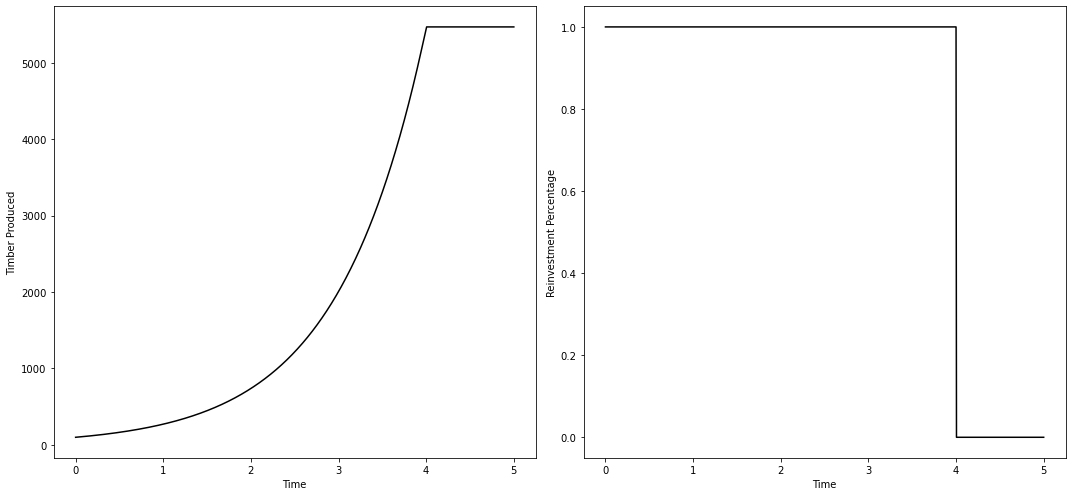

In [16]:
x_0 = 100
k = 1
r = 0
T = 5
domain, x_vals, u_vals = get_timber(x_0, k, r, T)
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].plot(domain, x_vals, 'k')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Timber Produced')
ax[1].plot(domain, u_vals, 'k')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Reinvestment Percentage')
fig.tight_layout()
plt.show()

# Problem 3

Plot the same graphs that you did in problem 2, but instead for the following values: $x_{0} = 100$, $k = 0.3$, $r = 0.05$, and $T = 5$. At what time does the switching point occur?

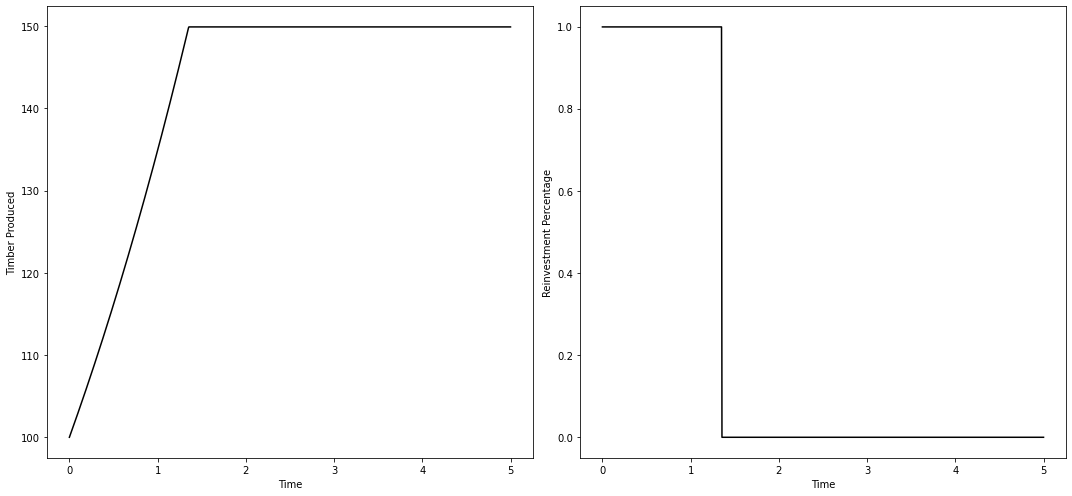

The switching point occurs at:
1.355 seconds


In [15]:
x_0 = 100
k = .3
r = .05
T = 5
domain, x_vals, u_vals = get_timber(x_0, k, r, T)
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].plot(domain, x_vals, 'k')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Timber Produced')
ax[1].plot(domain, u_vals, 'k')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Reinvestment Percentage')
fig.tight_layout()
plt.show()
print('The switching point occurs at:')
print(str(domain[np.argmin(u_vals)]) + ' seconds')

# Problem 4

Now use the same parameters as in problem 3, but vary the initial value of the timber production capacity ($x_{0}$). You should try a smaller value, a slightly larger value, and fairly larger value for $x_{0}$. What do you notice about the optimal controls (are they the same or are they different)?


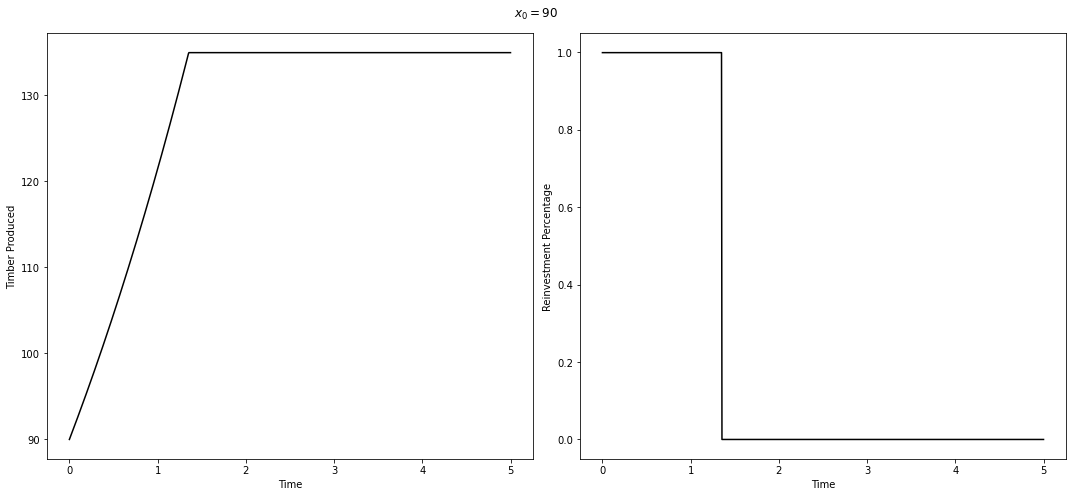

In [17]:
x_0 = 90
k = .3
r = .05
T = 5
domain, x_vals, u_vals = get_timber(x_0, k, r, T)
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].plot(domain, x_vals, 'k')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Timber Produced')
ax[1].plot(domain, u_vals, 'k')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Reinvestment Percentage')
plt.suptitle('$x_0=90$')
fig.tight_layout()
plt.show()

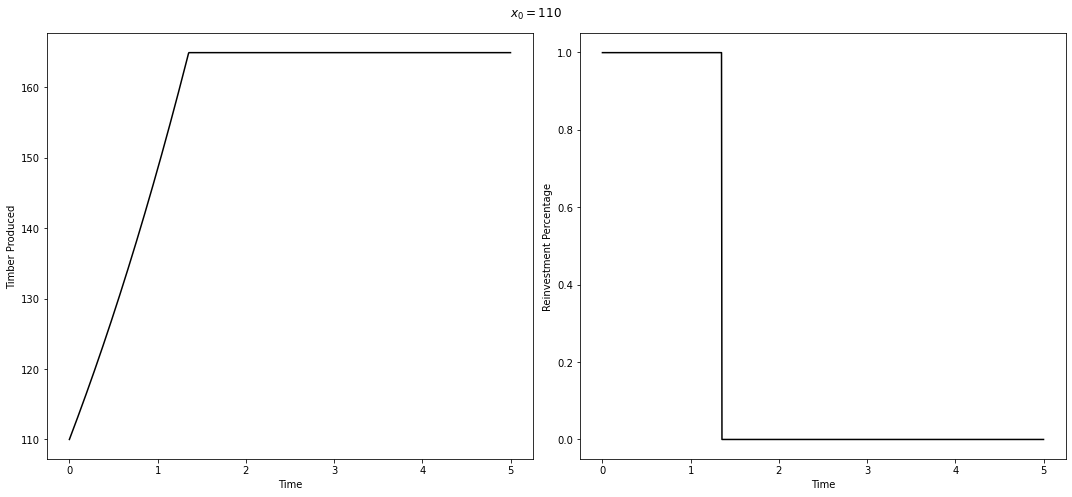

In [18]:
x_0 = 110
k = .3
r = .05
T = 5
domain, x_vals, u_vals = get_timber(x_0, k, r, T)
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].plot(domain, x_vals, 'k')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Timber Produced')
ax[1].plot(domain, u_vals, 'k')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Reinvestment Percentage')
plt.suptitle('$x_0=110$')
fig.tight_layout()
plt.show()

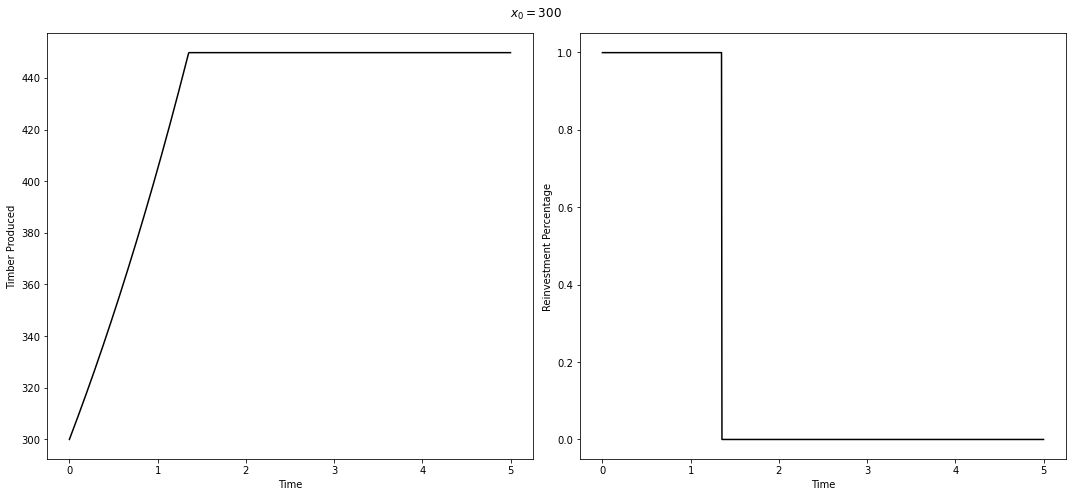

The optimal controls are all the same. This makes sense since
we are generation a bang-bang solution to optimize a problem
that boils down to proportions.


In [20]:
x_0 = 300
k = .3
r = .05
T = 5
domain, x_vals, u_vals = get_timber(x_0, k, r, T)
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].plot(domain, x_vals, 'k')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Timber Produced')
ax[1].plot(domain, u_vals, 'k')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Reinvestment Percentage')
plt.suptitle('$x_0=300$')
fig.tight_layout()
plt.show()
print('The optimal controls are all the same. This makes sense since')
print('we are generation a bang-bang solution to optimize a problem')
print('that boils down to proportions.')